>>>>>                                                           TITANIC SURVIVAL PREDICTION PROJECT.                                                                                                                      

                                                            IMPORTING THE BASIC LIBRARIES AND LOADING THE DATA.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'D:\Portfolio Manager\My start\1\PROJECTS\TITANIC\titanic_dataset.csv')
d = data.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


                                                            EXPLORATORY DATA ANALYSIS/ DATA UNDERSTANDING.

In [3]:
print('-> Data Informations:-')
data.info()
print()
print('-> Data(Observations, Features):-' , data.shape)
print()
print('-> Total Size of the Dataset is:-' , data.size)
print()
print('-> Stat Summary of Data:-' '\n', data.describe().T)

-> Data Informations:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

-> Data(Observations, Features):- (891, 12)

-> Total Size of the Dataset is:- 10692

-> Stat Summary of Data:-
              count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.0000

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print('-> Number of Duplicates if any;''\n', data.duplicated().value_counts())
print()
print('-> Number of Unique Values of Data-Points;''\n',data.nunique())
print()
print('-> Number of Missing Values if any ;' '\n', data.isna().sum())
print()
print('-> Data Types;''\n', data.dtypes)

-> Number of Duplicates if any;
 False    891
dtype: int64

-> Number of Unique Values of Data-Points;
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

-> Number of Missing Values if any ;
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-> Data Types;
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


>    "INSIGHT 1:" Survived | P(assenger)class | Sex | Sib(lings)Sp(ouse) | Par(ents)ch(ildrens) | Cabin | Embarked Feature Variables are Categorical as Object | Numerical Data Type Variables where except for sex the other data variables are in numerical datatype format which actually needs to changed to category datatypes (each numerical datas represent a category/ type) and some features are not needed at all which shall be removed in feature engineering, whereas Age | Fare are Discrete-Numerical Data Type Variables.

    EXPLORATORY DATA ANALYSIS | DATA UNDERSTANDING.

* Note: Since the dataset is small, I am starting with some Data Pre-processing and Feature Engineering before EDA.

Checking Corelation for Feature Removal.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6472\1870559391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cbar= True, linecolor= 'orange', linewidths=1.5, cmap='PRGn_r', annot = True, fmt='.2%', cbar_kws = {"shrink":.8, 'extend':'both'})


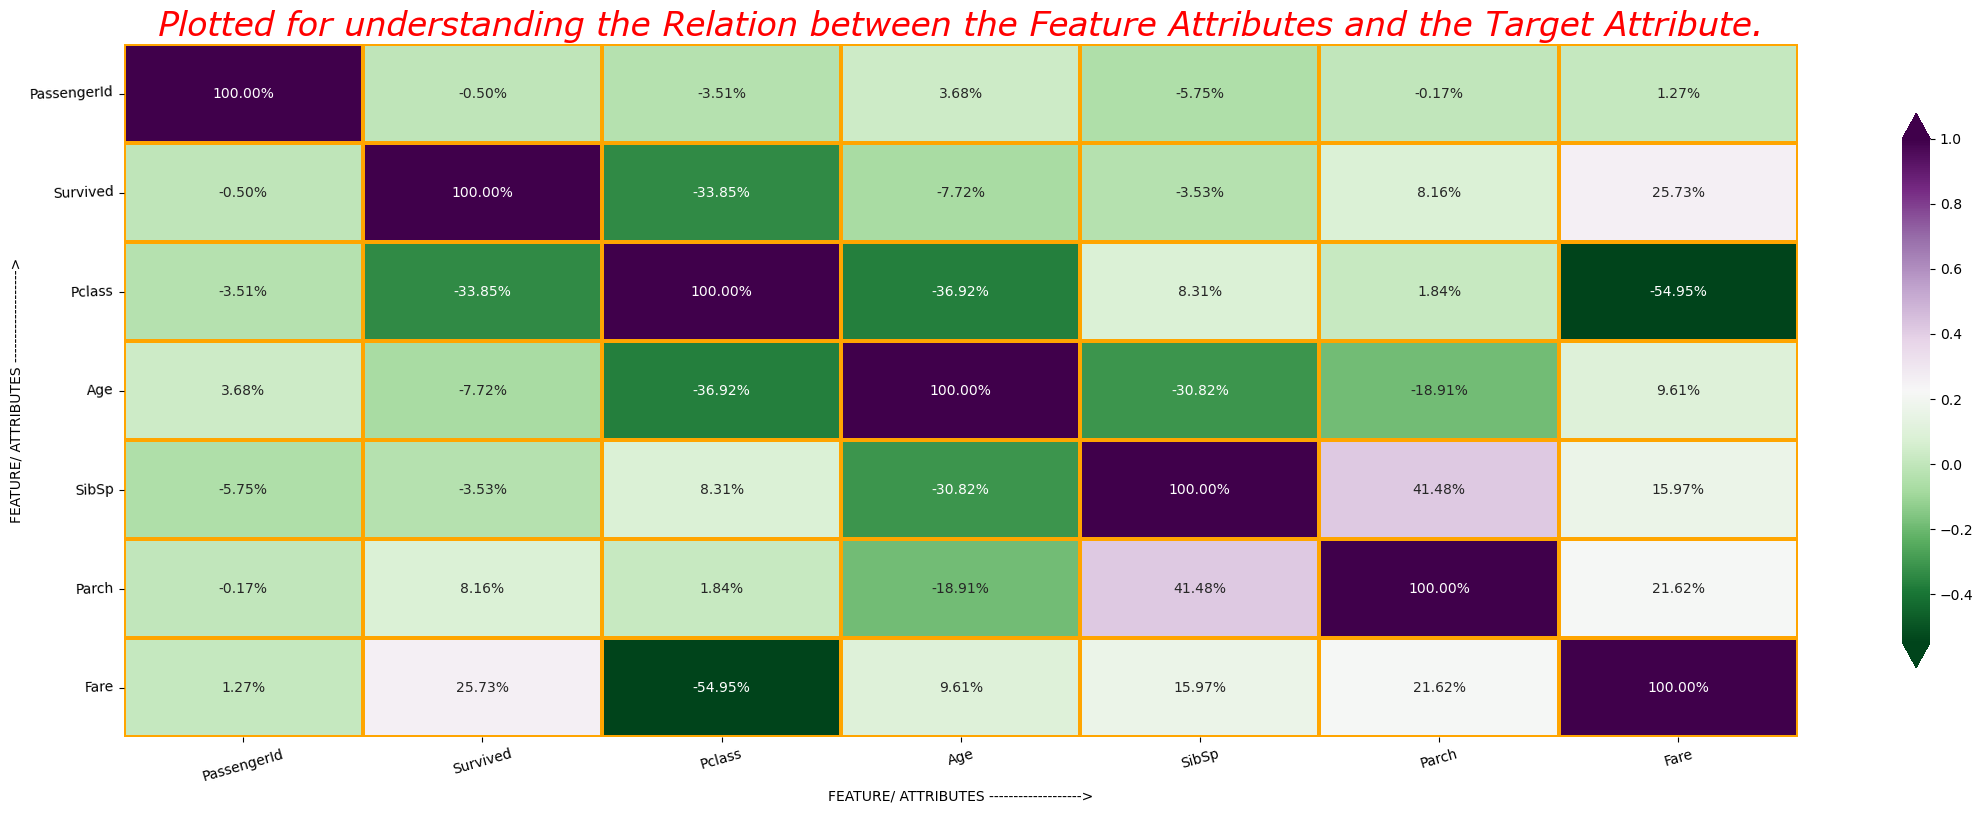

In [6]:
plt.subplots(figsize= (27,9))
sns.heatmap(data.corr(), cbar= True, linecolor= 'orange', linewidths=1.5, cmap='PRGn_r', annot = True, fmt='.2%', cbar_kws = {"shrink":.8, 'extend':'both'})
plt.title('Plotted for understanding the Relation between the Feature Attributes and the Target Attribute.', fontdict = {'family': 'Verdana', 'color':  'red', 'style':'italic', 'size':'24'})
plt.xlabel('FEATURE/ ATTRIBUTES ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.xticks(rotation = 16)
plt.yticks(rotation = 2)
plt.show()

> "INSIGHT 2:" Anyway it's impossible to Feature Engineer only with reference to above Corelation plot to distinghuish which all are not a influencing factor for 'Survival' which is the target variable. But the least corelated features like; PassengerId | Name | Ticket | Cabin & Pclass or Passenger Class could also be removed as it's very much negatively corelated but I am moving with it to dig out some insights based on Survival rate of Passengers based on their travelling class.

    FEATURE ENGINEERING | DATA PRE-PROCESSING.

In [7]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
num = data[['Age', 'Fare']]
num.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
num.dtypes

Age     float64
Fare    float64
dtype: object

> "INSIGHT 3:" In num dataframe, the features 'Age' & 'Fare' are continuous numerical data-type variables.

In [11]:
cat = data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
cat.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S


In [12]:
cat.dtypes

Survived     int64
Pclass       int64
Sex         object
SibSp        int64
Parch        int64
Embarked    object
dtype: object

In [13]:
cat = cat[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']].astype('category')
cat.dtypes

Survived    category
Pclass      category
Sex         category
SibSp       category
Parch       category
Embarked    category
dtype: object

    --> UNIVARIATE ANALYSIS

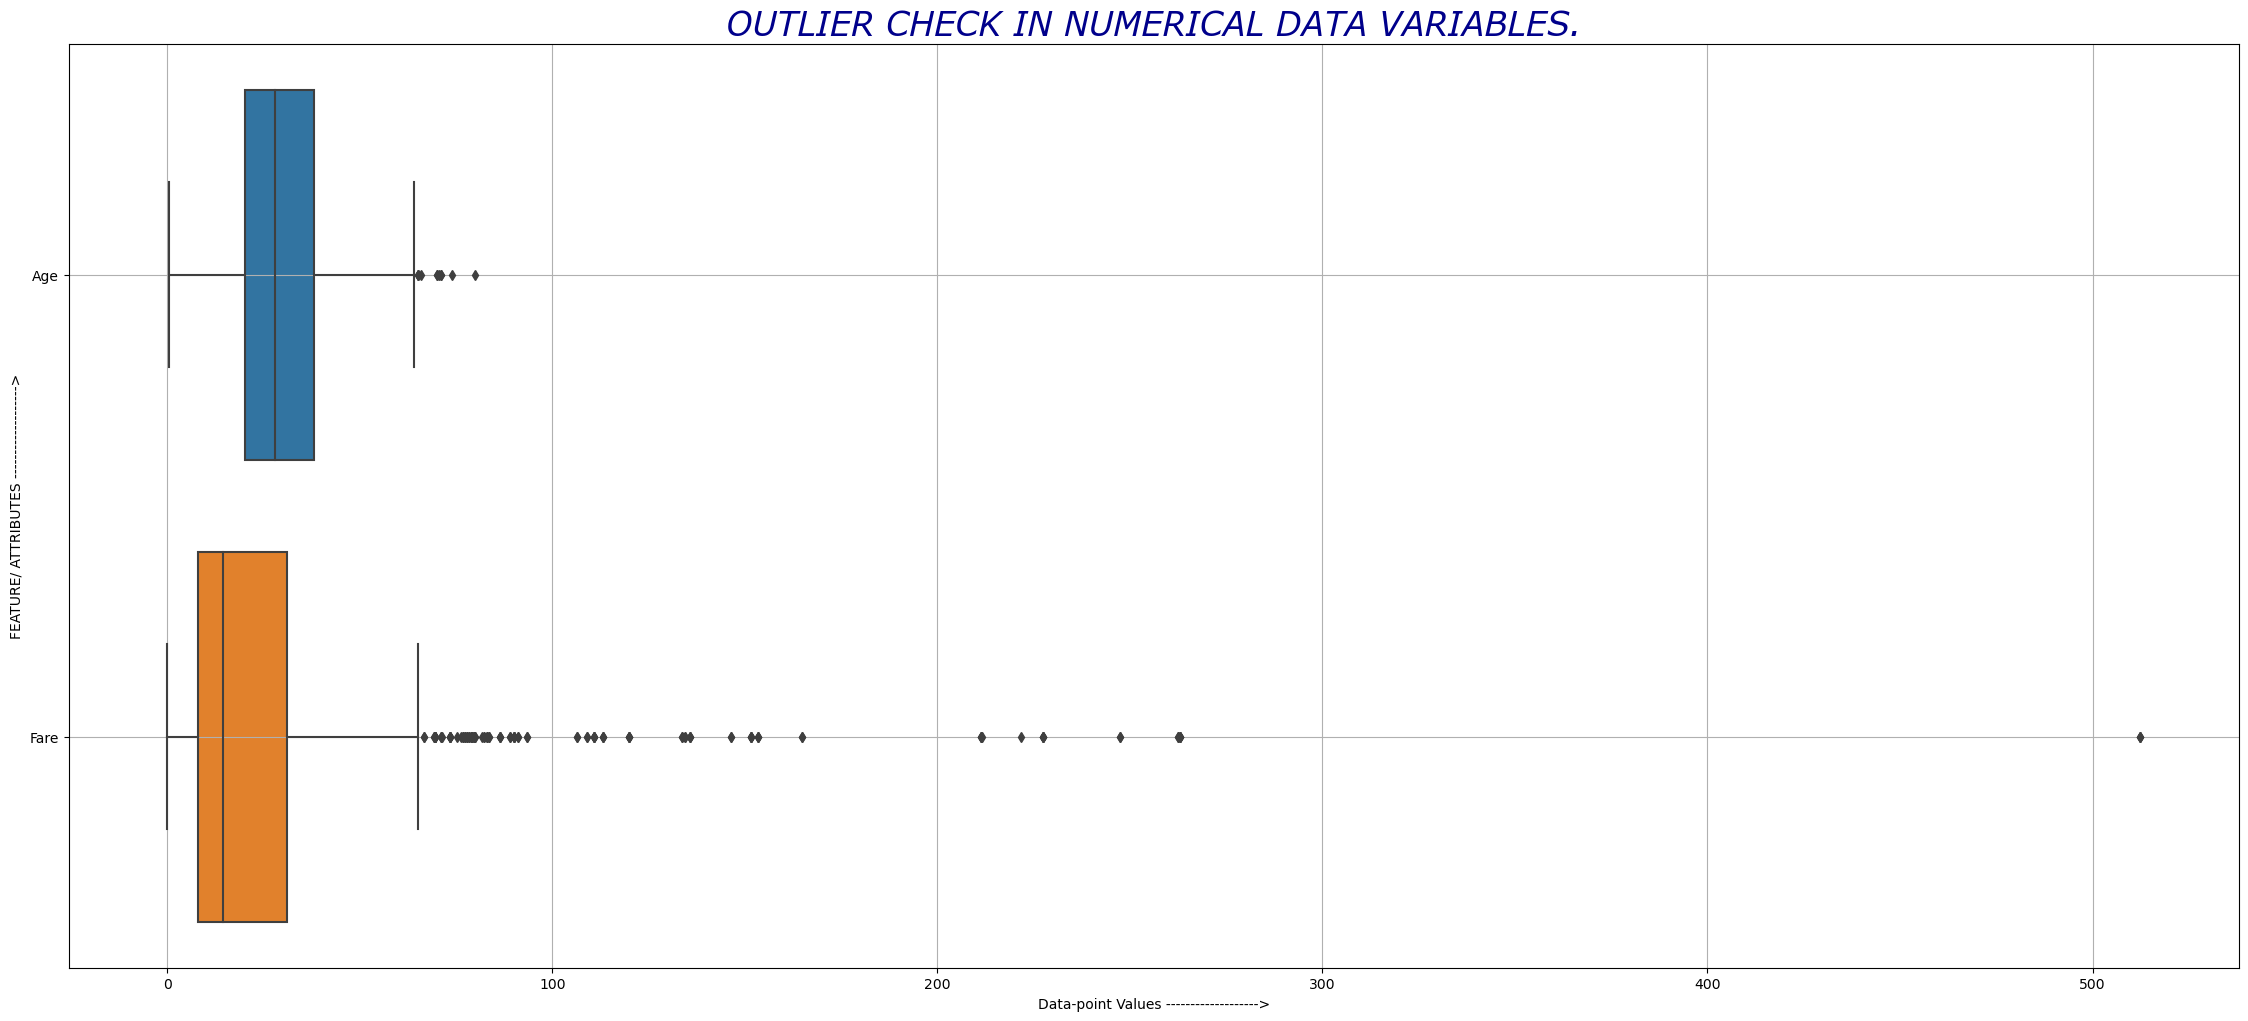

In [14]:
plt.figure(figsize=(28,12))
sns.boxplot(data = num, orient = 'h' )
plt.title('OUTLIER CHECK IN NUMERICAL DATA VARIABLES.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

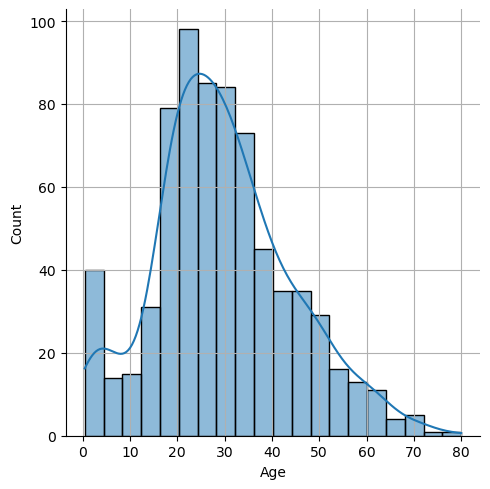

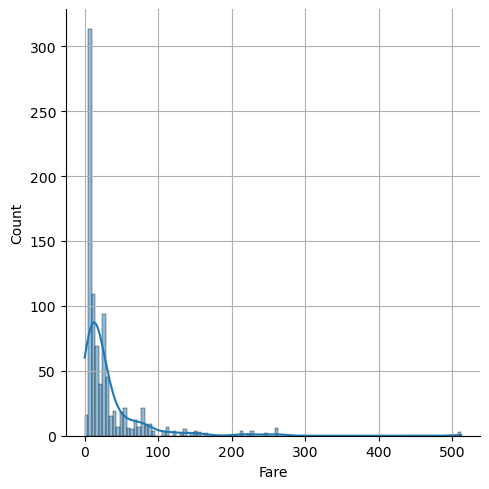

In [15]:
for i in num:
    sns.displot(data = num, x = num[i], kde = True)
    plt.grid()

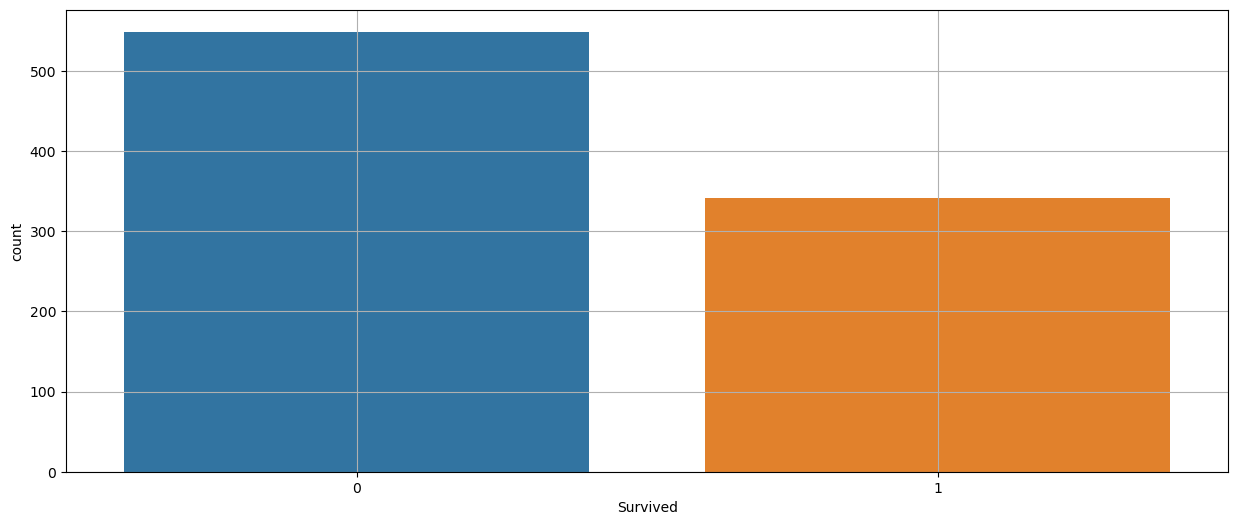

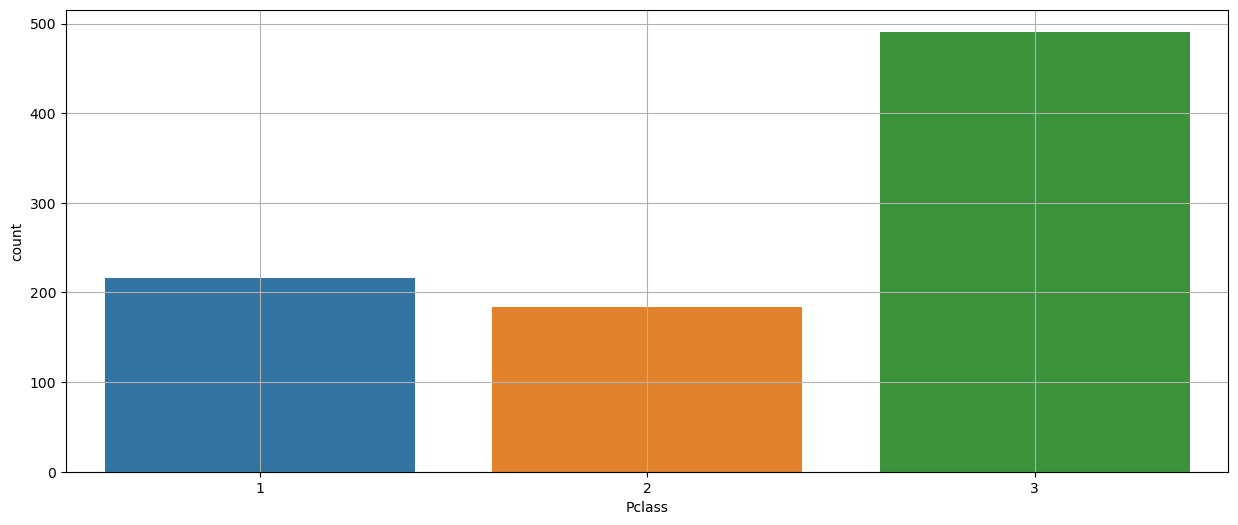

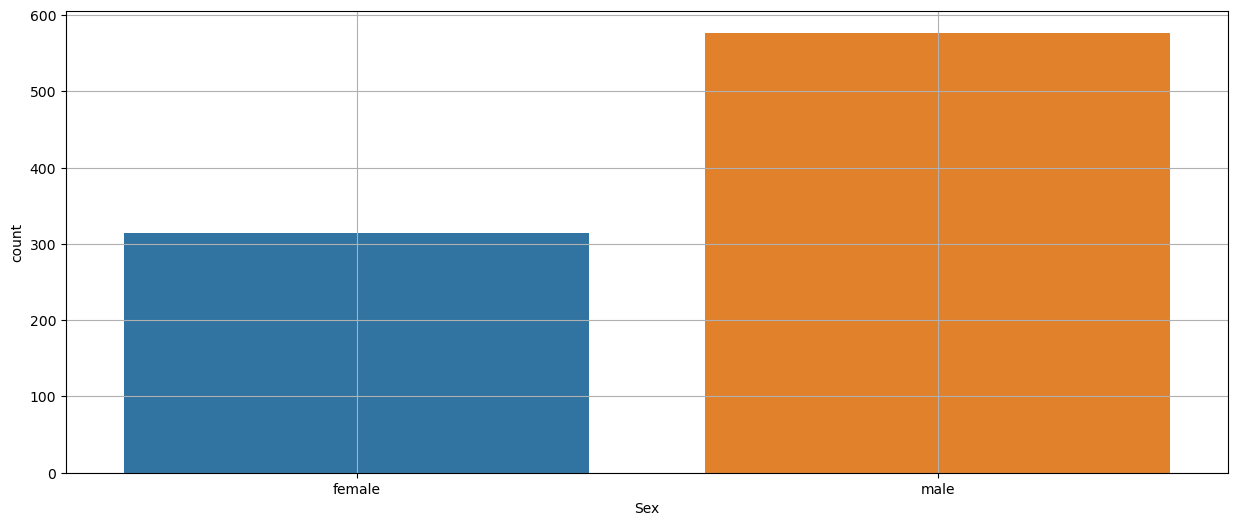

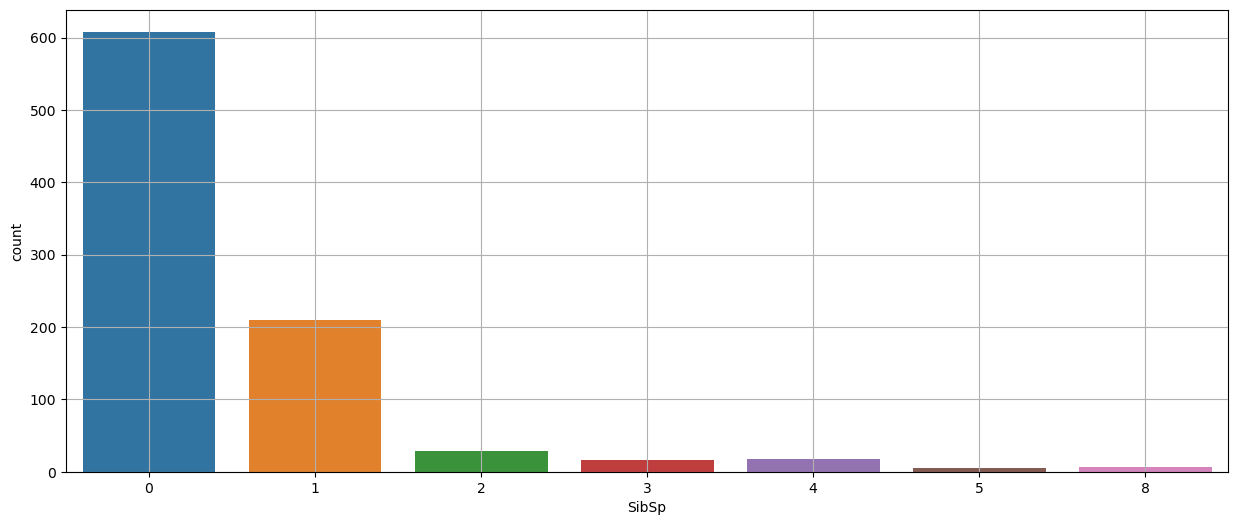

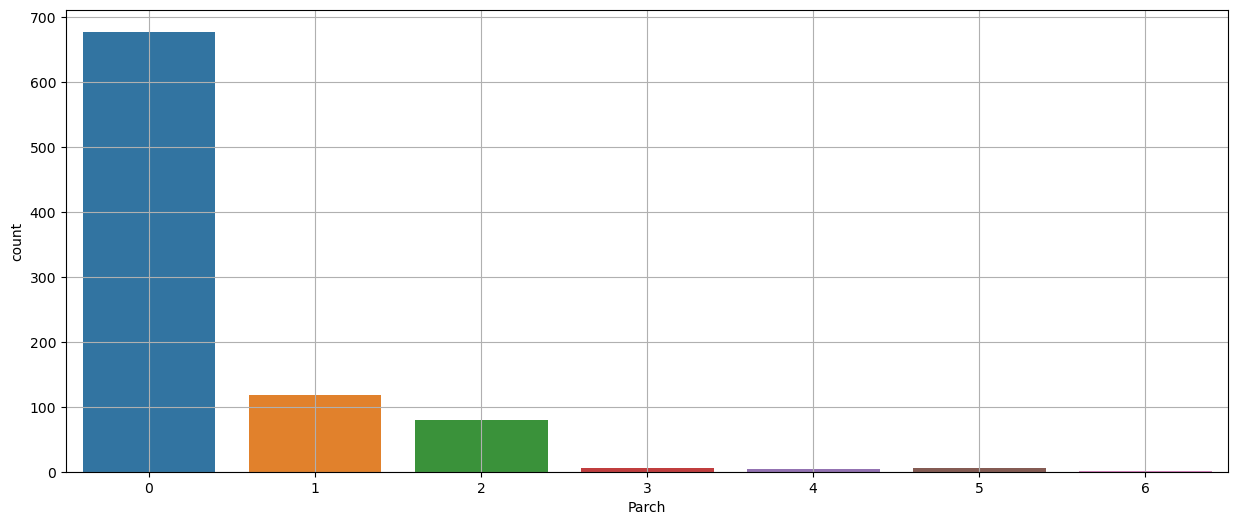

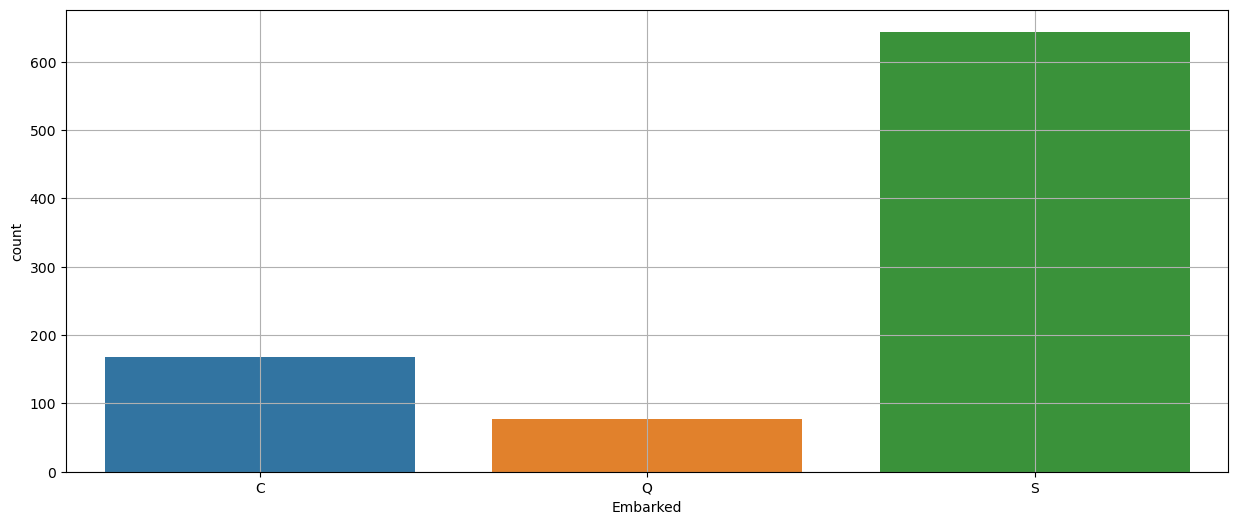

In [16]:
for i in cat:
    plt.figure(figsize=(15,6))
    sns.countplot(data = cat, x = cat[i])
    plt.grid()

> "INSIGHT 4:" (i) Of 891 ticket owner identified passengers 'more than half' did not survived the accident. (ii) More passengers where travelling on the '3rd Class'. (iii) Majority of the individuals where 'Male Passengers'. (iv) Of these 891 individuals 'more than 600' passengers did not travel with their family(Siblings, Spouse, Parents & Children). & (v) Most of the passengers got into the ship from 'S' named port/ passenger terminal.

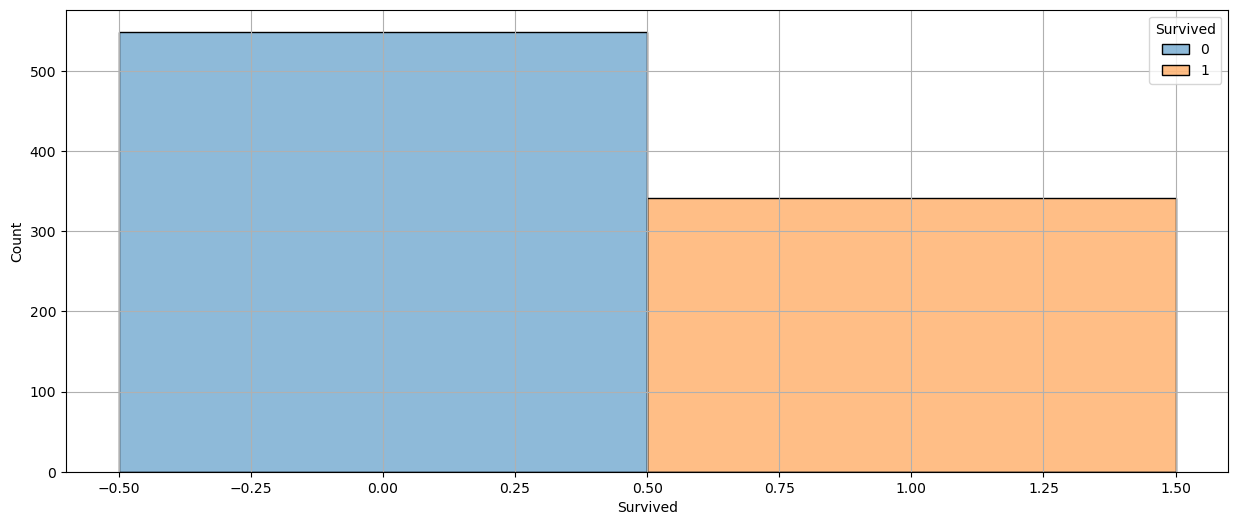

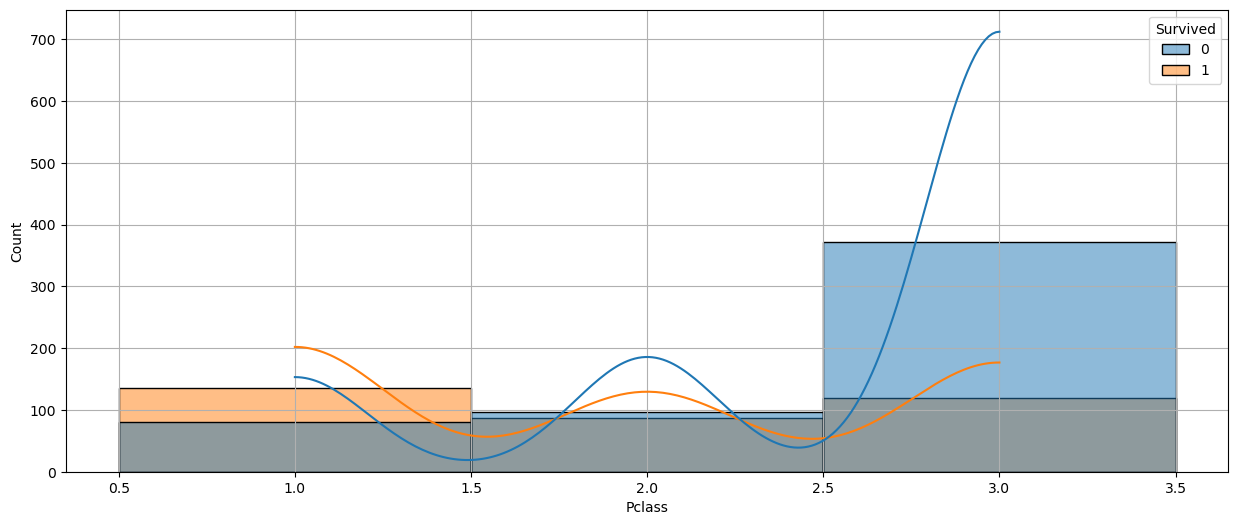

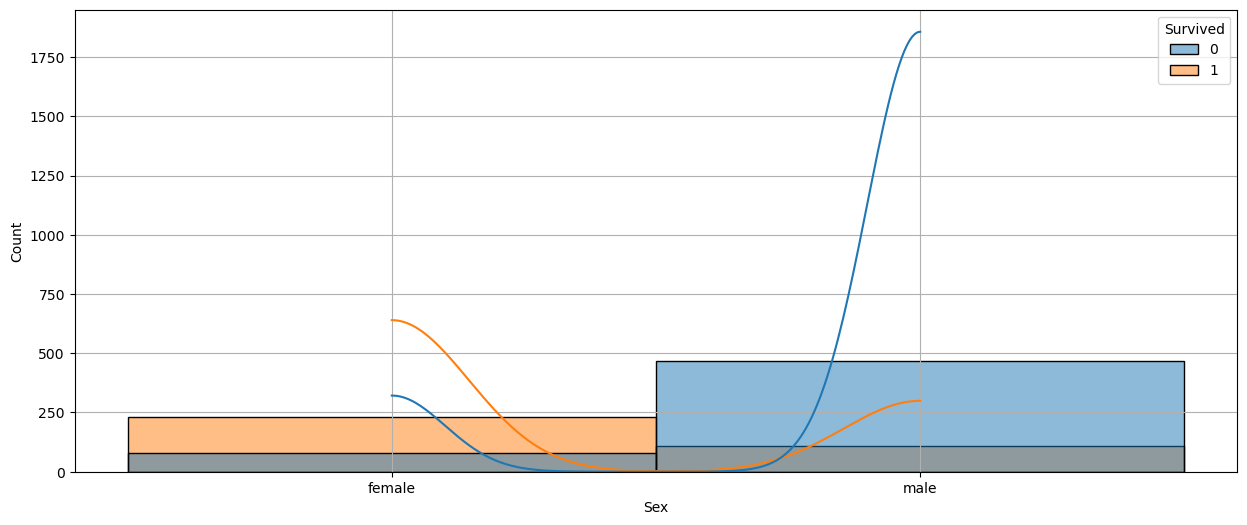

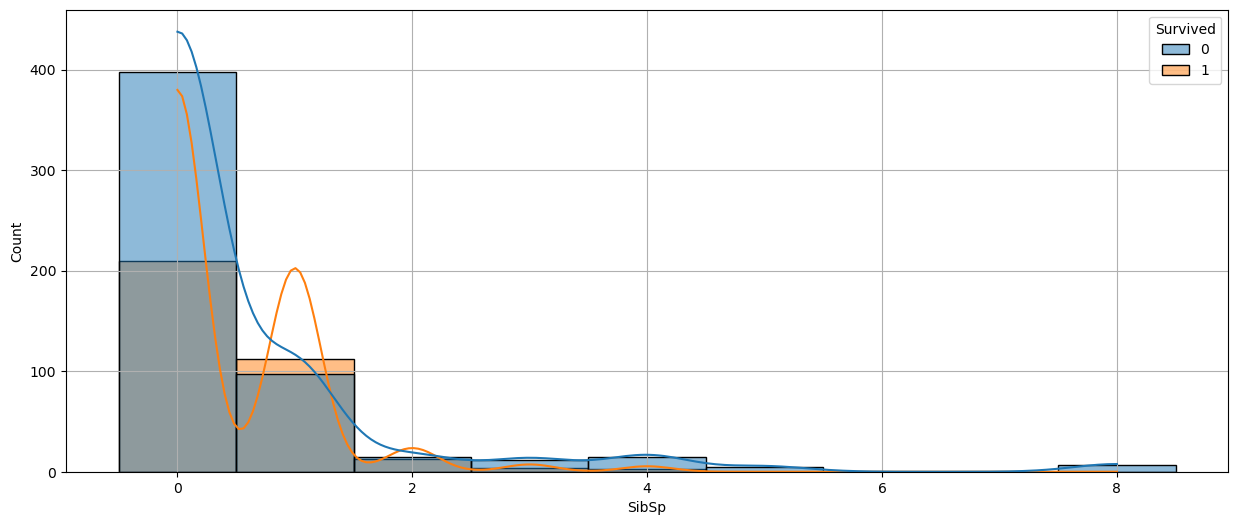

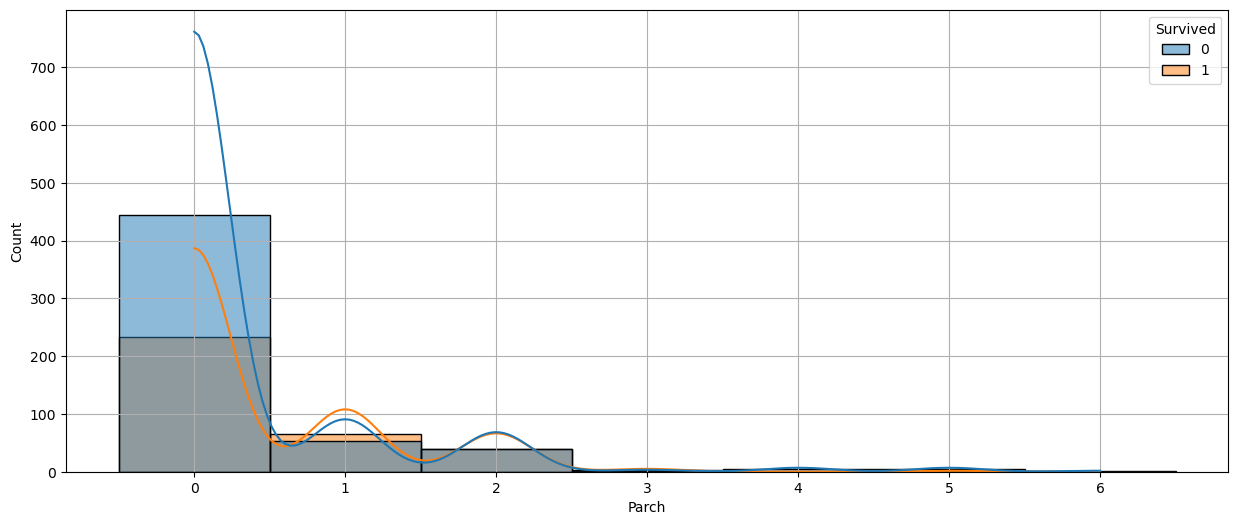

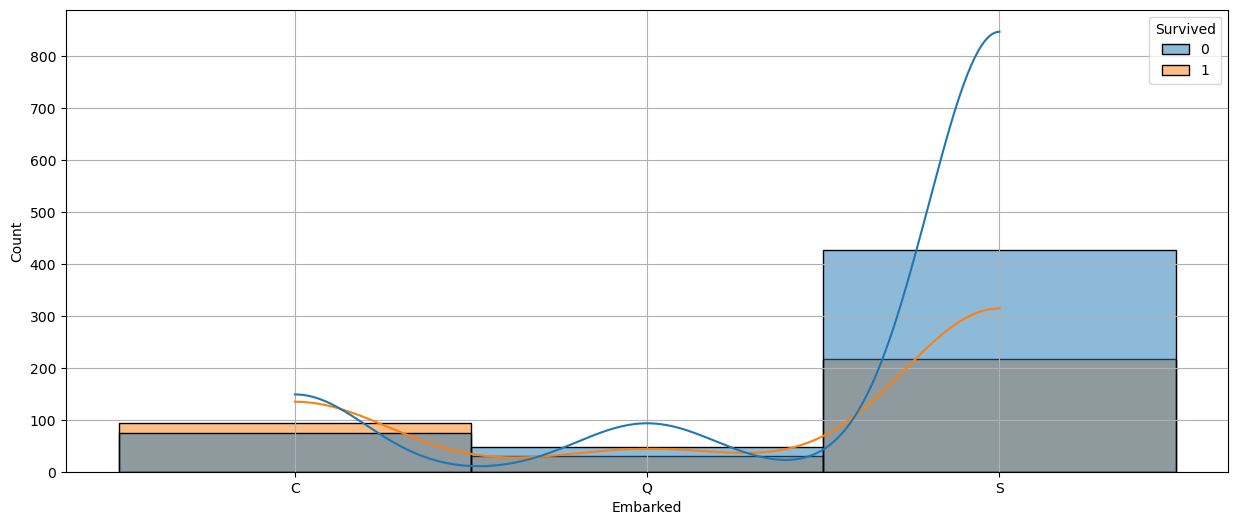

In [17]:
for i in cat:
    plt.figure(figsize=(15,6))
    sns.histplot(data = cat, x = cat[i], kde = True, hue = cat['Survived'])
    plt.grid()

> "INSIGHT 5:" (i) Of these "891 ticket reegistered passengers" 350+ 3rd Class Passengers did not survived the crash, 1st class travellers are the most rescued passengers from crash.  (ii) Over 400 males travellers did not survived, more than 50% of the female travellers were rescued the crash.  (iii) More passengers died whom had their family 1 each from Siblings/ Spouse and Parents/ Childrens.  (iv) More Survvivors and death whereof the passengers who got on the titanic was from 'S' terminal.

    --> BI-VARIATE ANALYSIS

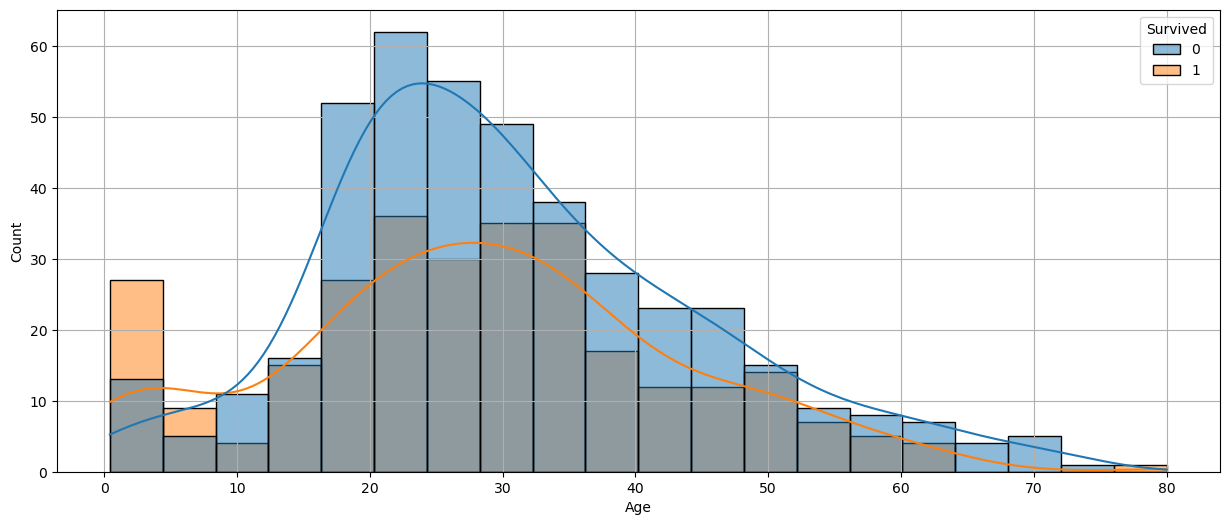

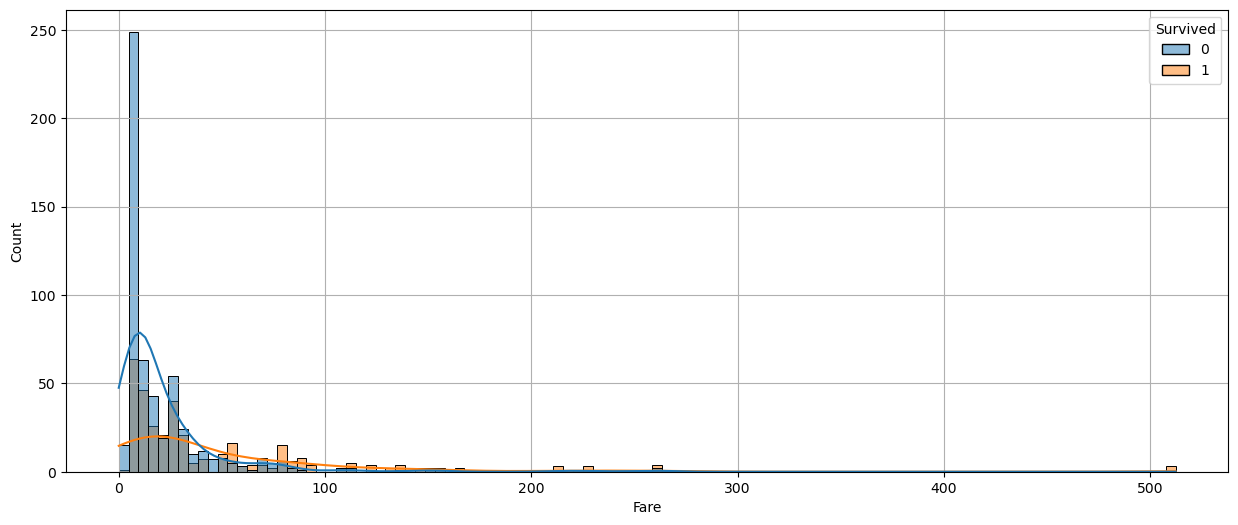

In [18]:
for i in num:
    plt.figure(figsize=(15,6))
    sns.histplot(data = num, x = num[i], kde = True, hue = cat['Survived'])
    plt.grid()

> "INSIGHT 6:" (i) When Compared wrt Survival among the Age group; Children's Age 1-9 survived most of the total among themself, Teen's Age 10-15 survived either 50% of total or similar counts of deaths and survival, Adults 18+ and Mid-aged passengers of age 25-45 had more deaths than survived numbers, Almost all the old aged passengers of age 65-75 entirely died, but the 75-80 year old aged passengers survived the crash.

    -->TREATING OF MISSING VALUES.

In [19]:
num.isna().sum()

Age     177
Fare      0
dtype: int64

*Note: Age Variables datas are not in a Gaussian distribution pattern, hence the nan is filled with its median value.

In [20]:
for a in ['Age']:
    num[a] = num[a].fillna(num[a].median())

C:\Users\Admin\AppData\Local\Temp\ipykernel_6472\3799664281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num[a] = num[a].fillna(num[a].median())


In [21]:
cat.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

*Note: Embarked Variables data are Category and Object data-type, hence nan is filled with its mode value.

In [22]:
for c in ['Embarked']:
   cat[c] = cat[c].fillna(cat[c].mode()[0])

    --> TREATING OUTLIERS.

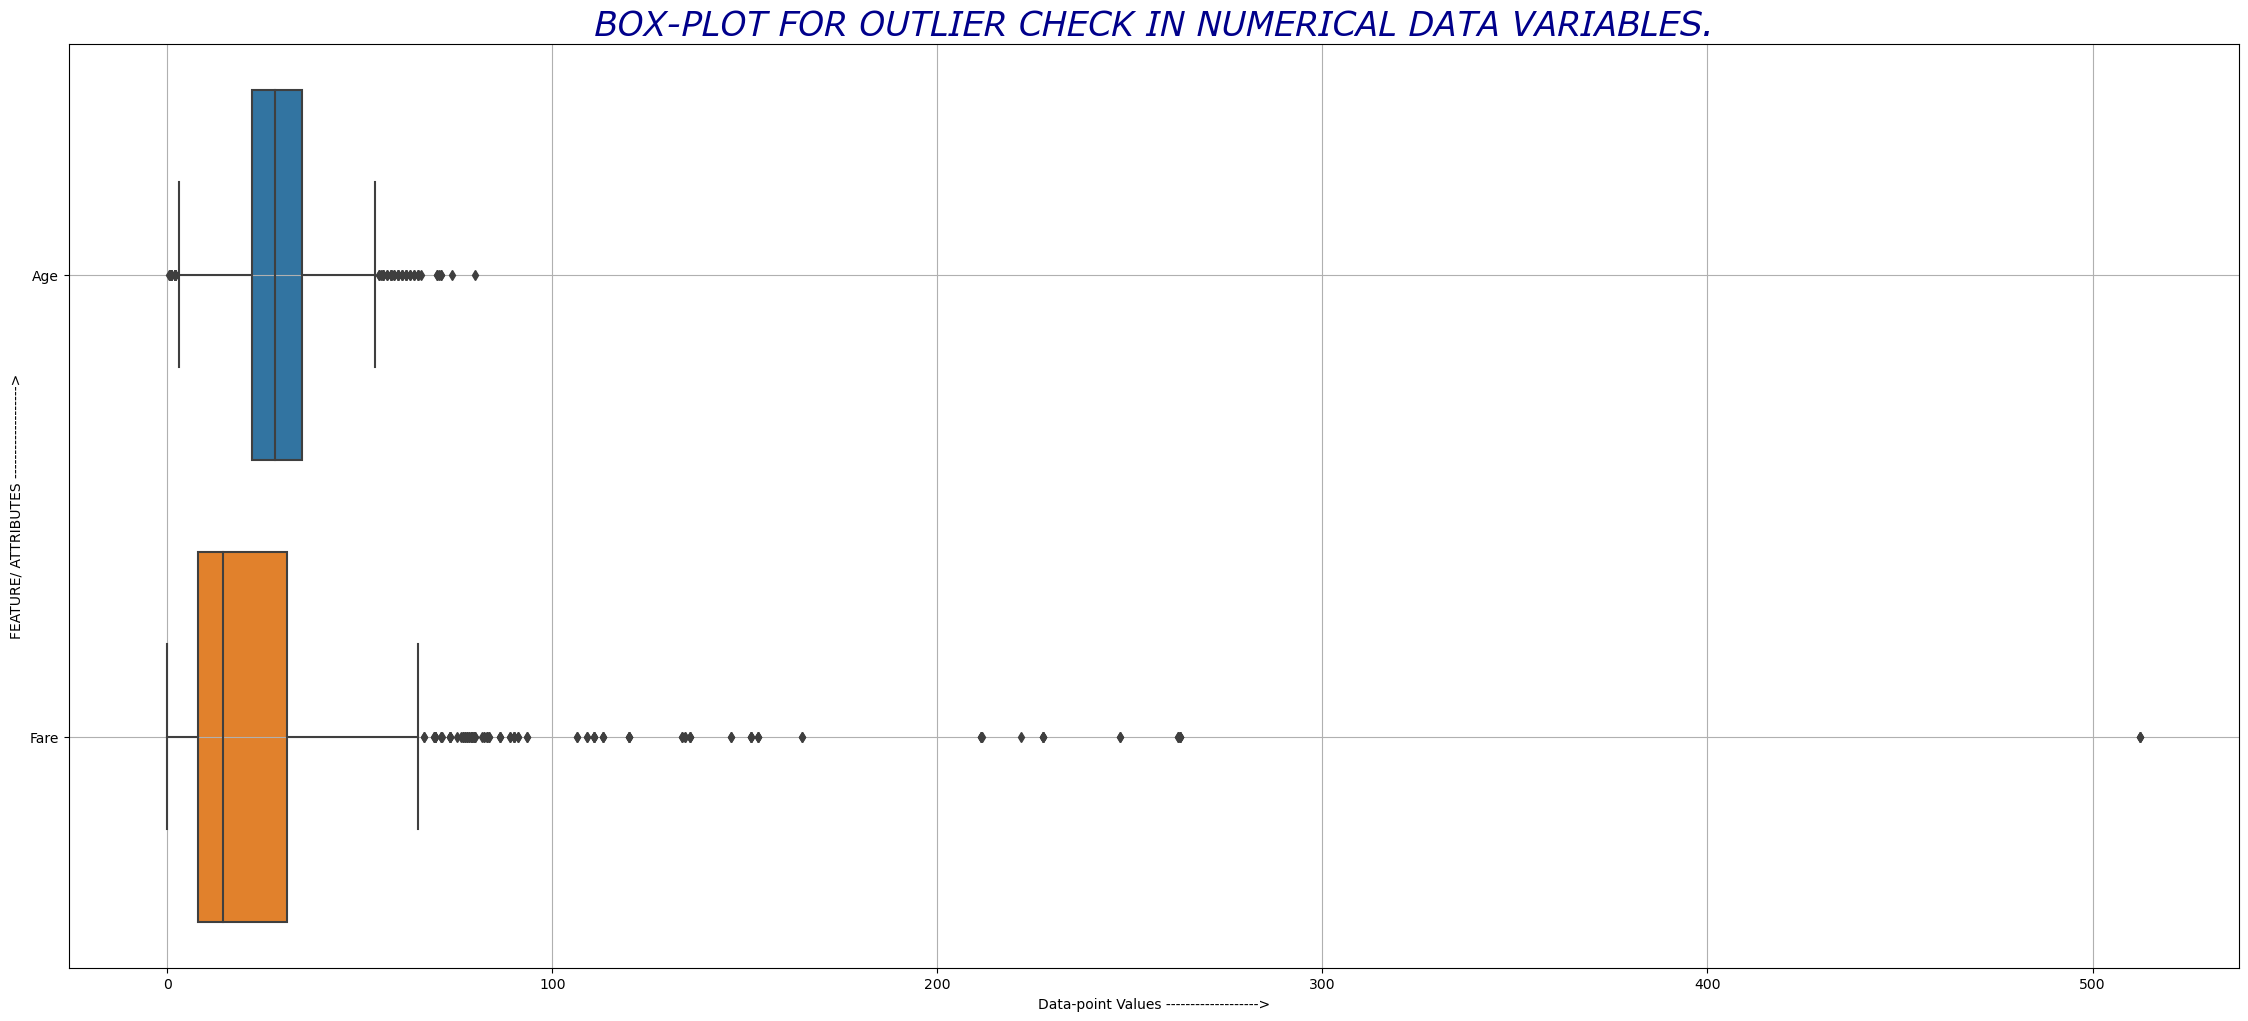

In [23]:
plt.figure(figsize=(28,12))
sns.boxplot(data = num, orient = 'h' )
plt.title('BOX-PLOT FOR OUTLIER CHECK IN NUMERICAL DATA VARIABLES.', fontdict = {'family': 'Verdana', 'color':  'darkblue', 'style':'italic', 'size':'24'})
plt.xlabel('Data-point Values ------------------->')
plt.ylabel('FEATURE/ ATTRIBUTES ------------------->')
plt.grid()

Finding out each and every Outliers using IQR Method.

In [24]:
Q1_A = np.percentile(num['Age'], 25, interpolation='midpoint')
Q2_A = np.percentile(num['Age'], 50, interpolation='midpoint')
Q3_A = np.percentile(num['Age'], 75, interpolation='midpoint')
print('Q1 =', Q1_A)
print('Q2 =', Q2_A)
print('Q3 =', Q3_A)
print('')
IQR_A = Q3_A - Q1_A
print('Whisker Width =', IQR_A)
print('')
low_limit_A = Q1_A - 1.5*IQR_A
up_limit_A = Q3_A + 1.5*IQR_A
print('Lower Fence =', low_limit_A)
print('Upper Fence =', up_limit_A)

Outlier_A = []
for i in num['Age']:
    if((i>up_limit_A) or (i<low_limit_A)):
        Outlier_A.append(i)

print('The Outliers in the Continuous Numerical Variable Age are: ', sorted(Outlier_A)) 


Q1 = 22.0
Q2 = 28.0
Q3 = 35.0

Whisker Width = 13.0

Lower Fence = 2.5
Upper Fence = 54.5
The Outliers in the Continuous Numerical Variable Age are:  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]


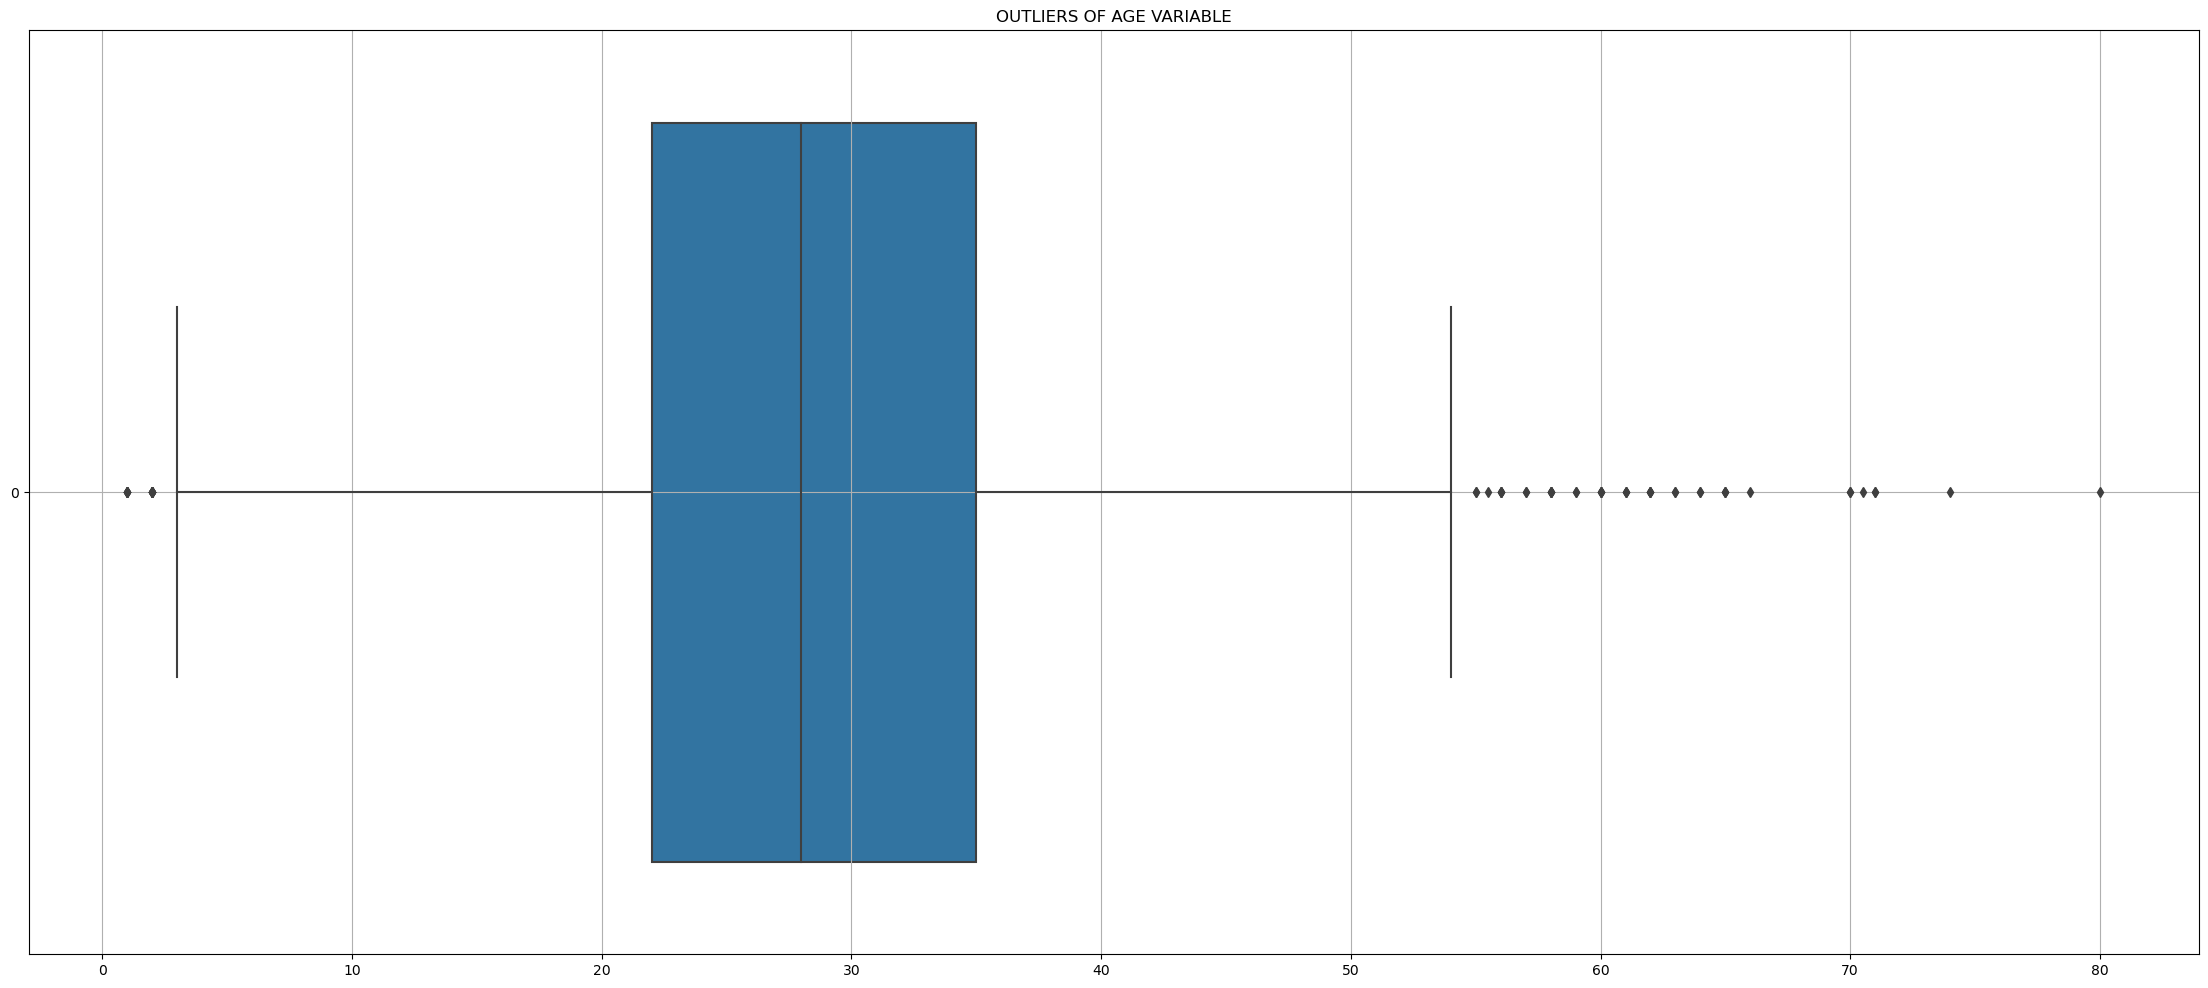

In [37]:
plt.figure(figsize=(28,12))
sns.boxplot(data = num['Age'], orient = 'h')
plt.title('OUTLIERS OF AGE VARIABLE')
plt.grid()

* Storing the numerical values in a temporary datframe for detailed analysis of negative outliers and later treatment of them specifically.

In [26]:
df = num.sort_values('Age', ascending=True)
df.head(20)

,Age,Fare
803,0.42,8.5167
755,0.67,14.5000
644,0.75,19.2583
469,0.75,19.2583
831,0.83,18.7500
78,0.83,29.0000
305,0.92,151.5500
164,1.00,39.6875
827,1.00,37.0042
172,1.00,11.1333


In [27]:
dump_indices = num[num['Age'] < 1].index
print(dump_indices)

Int64Index([78, 305, 469, 644, 755, 803, 831], dtype='int64')


In [28]:
num.drop(dump_indices, inplace=True)
cat.drop(dump_indices, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6472\146108424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num.drop(dump_indices, inplace=True)


In [39]:
num['Age'] = num['Age'].replace({55.5: 55, 70.5: 70})

C:\Users\Admin\AppData\Local\Temp\ipykernel_6472\851373194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num['Age'] = num['Age'].replace({55.5: 55, 70.5: 70})


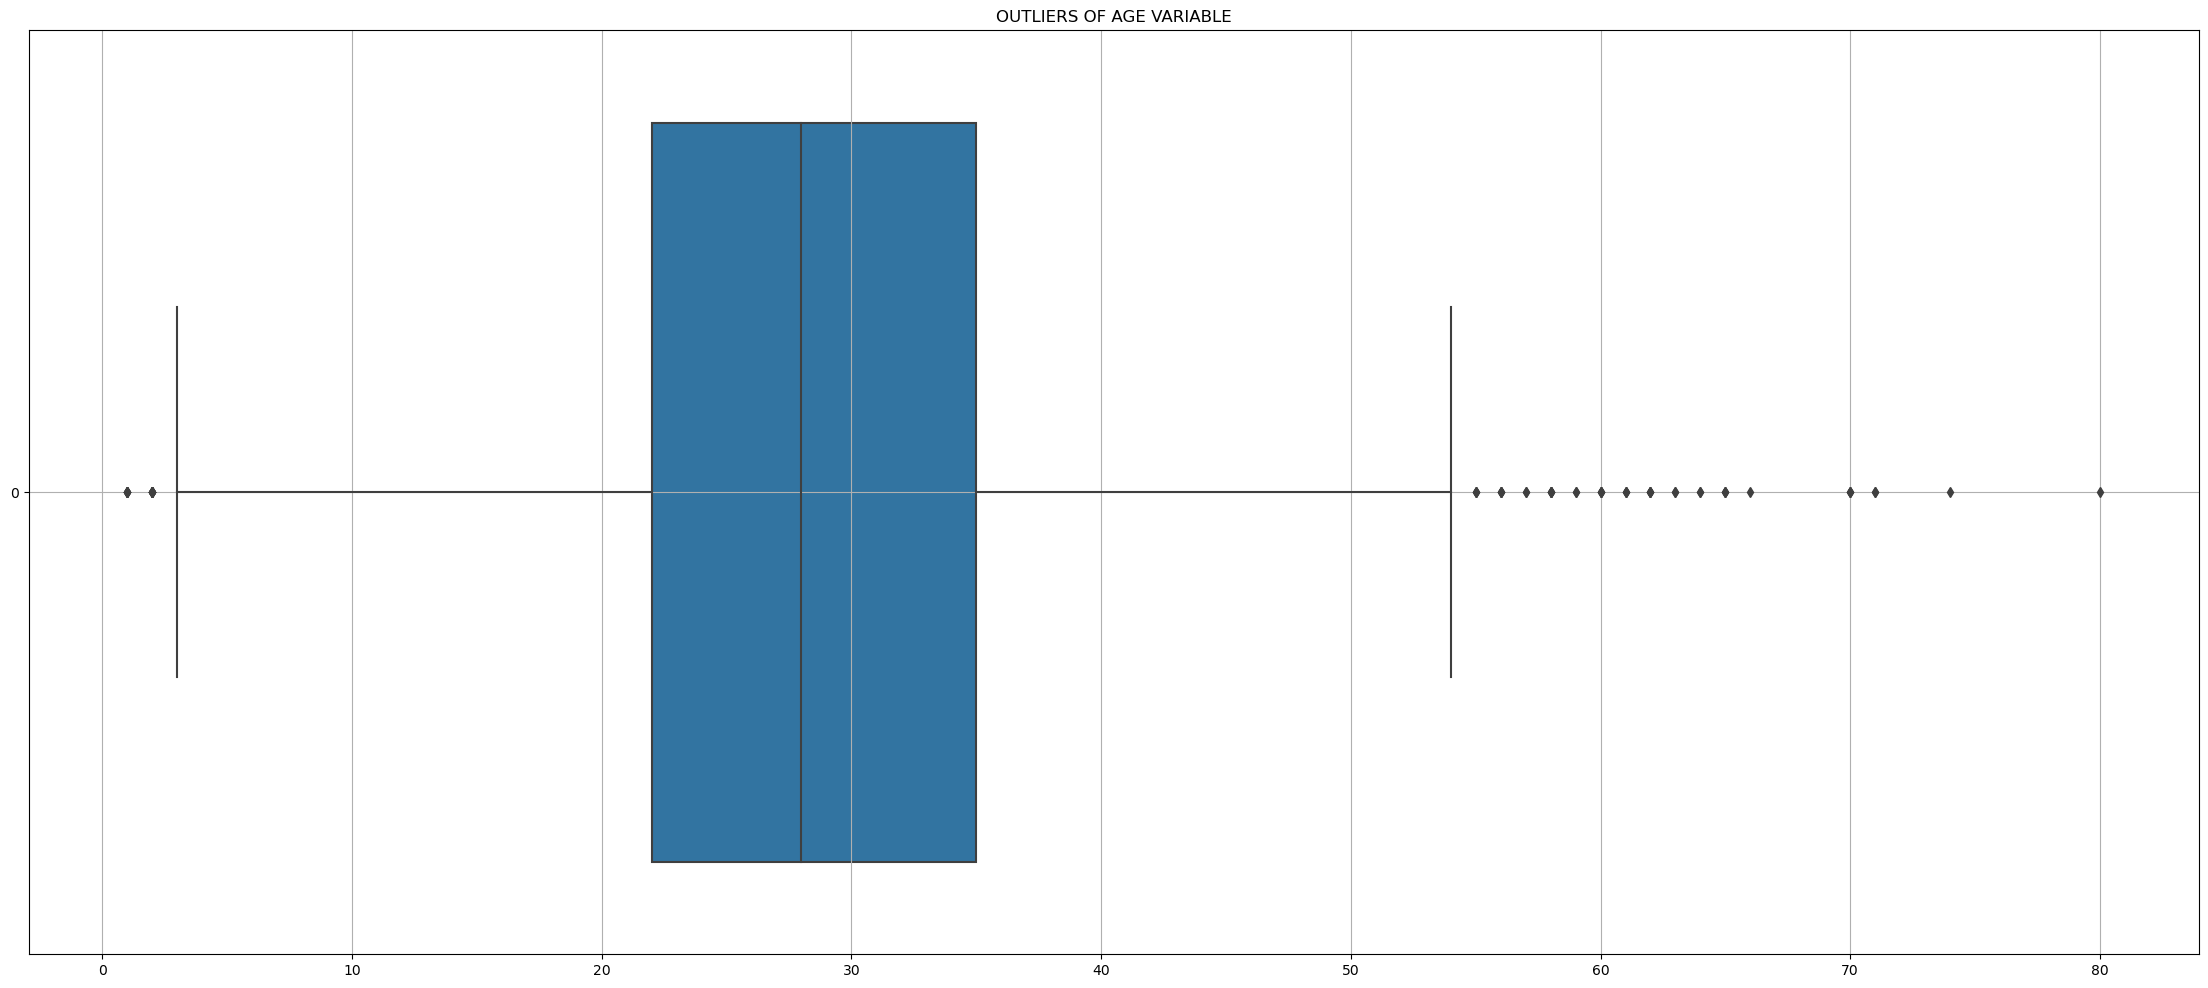

In [40]:
plt.figure(figsize=(28,12))
sns.boxplot(data = num['Age'], orient = 'h')
plt.title('OUTLIERS OF AGE VARIABLE')
plt.grid()